# Social Influence Modeling in Networks
## ---- Estimating and Embedding Heavy-Tailed Networks

#### Code 3 : Embedding Homogeneous Network

In [50]:
import networkx as nx
import matplotlib.pyplot as plt
import math, powerlaw, csv, random, warnings
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from itertools import count
warnings.filterwarnings("ignore")

initiate and calculate influence connection

In [133]:
def load_data(filepath, delim):
    g = nx.Graph()
    with open(filepath) as f:
        reader = csv.reader(f, delimiter=delim)
        for row in reader:
            g.add_edge(int(row[0]), int(row[1]))
    return g

def weight(g, cutoff=4, tau=0.6):
    w = {}
    for i in g.nodes():
        w[i] = {}
        for j in g.nodes():
            if(j>i):
                w[i][j] = 0
                for path in nx.all_simple_paths(g, source=i, target=j, cutoff=cutoff):
                    w[i][j]+= np.power(tau, len(path))
    return w

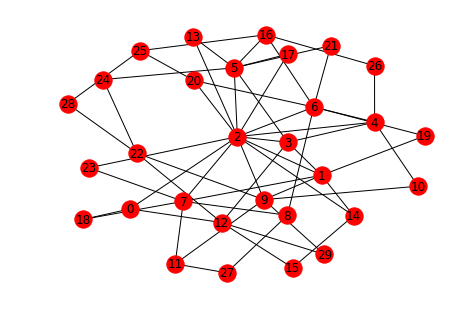

In [57]:
G = nx.barabasi_albert_graph(30, 2)
nx.draw_spring(G, with_labels=True)
plt.show()
W = weight(G)

In [58]:
def loss(W, V):
    if(len(W)!= len(V)):
        warnings.warn("W and V should have the same dimension")
    n = len(W)
    l = 0
    for i in range(n):
        for j in range(i+1, n):
            l += (w-np.matmul(V[i], V[j]))*(w-np.matmul(V[i], V[j]))
    return l

In [101]:
n = 30
dim = 20

V = np.random.rand(n, dim)
L = []
l = []
for t in range(40000):
    i = random.randint(0, n-1)
    j = random.randint(0, n-1)
    if(i==j):
        continue
    if(i<j):
        w = W[i][j]
    if(i>j):
        w = W[j][i]
    V[i] = V[i] + 0.001*(w-np.matmul(V[i], V[j]))*V[j]
    if(t%100==0):
        l.append(loss(W, V)/n)

print loss

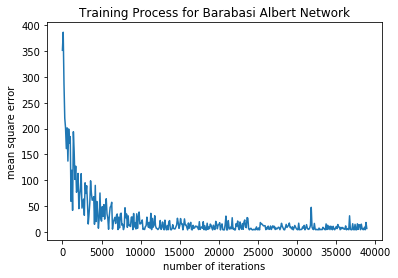

In [102]:
plt.plot([i*100 for i in range(len(l))], l)
plt.title("Training Process for Barabasi Albert Network")
plt.xlabel("number of iterations")
plt.ylabel("mean square error")
plt.savefig("./img/loss.pdf")
plt.show()

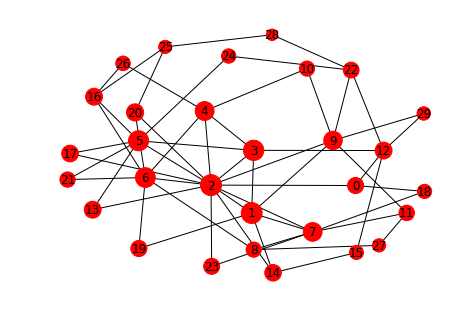

In [129]:
influ = []
for i in V:
    influ.append(np.sum(i)*60)
nx.draw_spring(G, with_labels=True, node_size=influ*10)
plt.savefig("./img/influ.pdf")
plt.show()